In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [3]:
data=pd.read_csv("Train.csv")
data.head()

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  12554      current      M   35          708     24893.00       378.00   
1  17645      current      M   35          123     18941.62       966.00   
2   7604      current      M   55          802      5678.87      2724.00   
3   1590      current      F   29          867     30489.50      1236.00   
4  16556      current      M   34          802      7441.40      6906.04   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  debit_count_may  \
0     10288.00     29664.00     16291.40  ...               40   
1     20672.00       287.00      4217.00  ...               78   
2      1964.50      3933.11     23956.25  ...               82   
3     12609.88      9138.14     17521.00  ...               38   
4      4364.00      1939.00      2121.00  ...               50   

   max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                24563.0          30051.32            12761.0   
1                23948.0          42119.05            76206.0   
2                10752.0          58373.25            75283.0   
3                12607.0          69851.51            68708.0   
4                25213.0          10071.00            80140.0   

   credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
0                 2               65                50836.0         Y   
1                21               63                23226.0         Y   
2                 7                1                27036.0         Y   
3                21               83                43037.0         Y   
4                 8               32                32044.0         Y   

   emi_active  cc_cons  
0     1674.09    20014  
1    13043.34    10173  
2    25375.27    16095  
3     3544.33     7707  
4    12780.44    96408  

[5 rows x 44 columns]

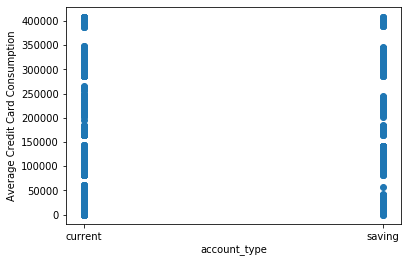

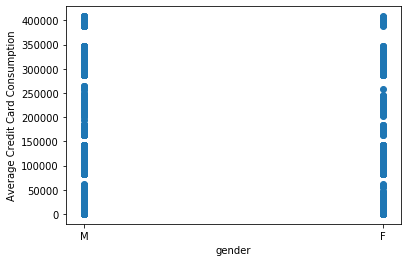

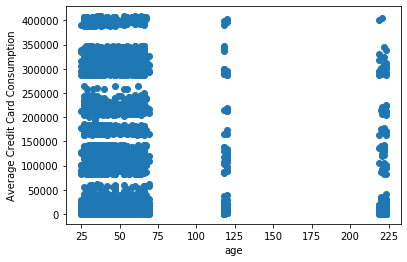

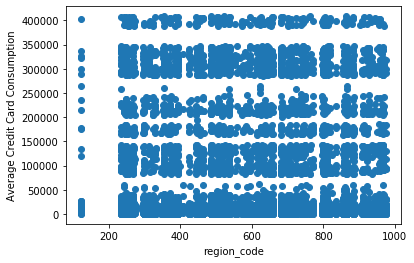

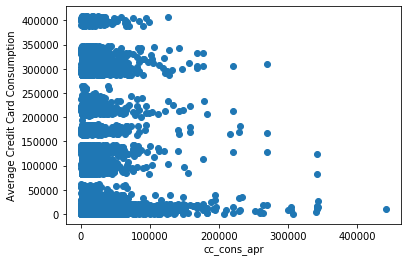

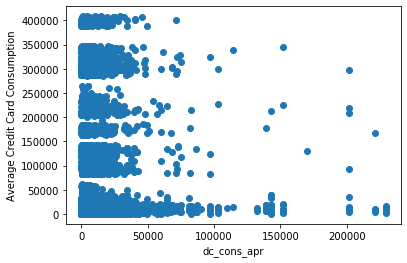

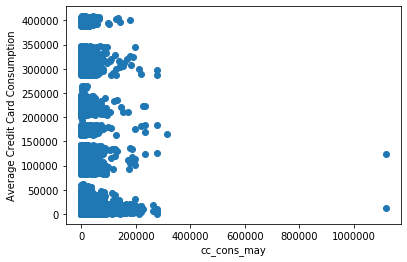

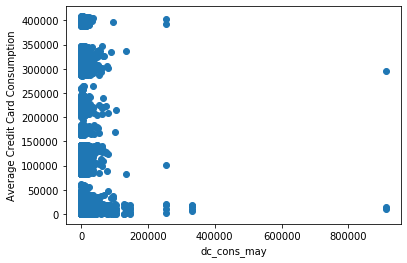

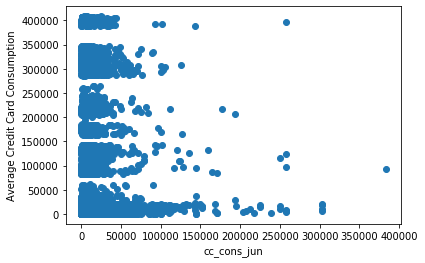

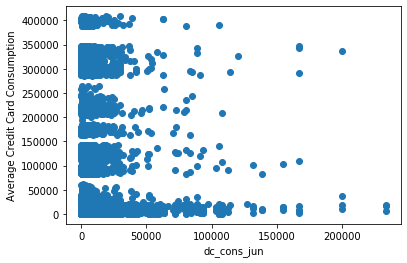

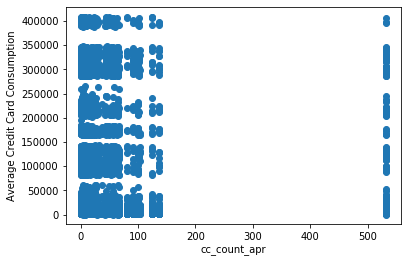

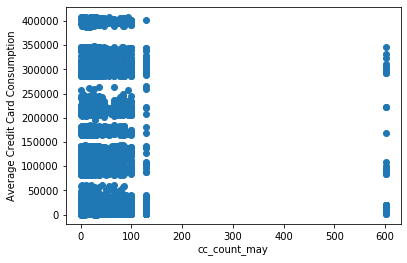

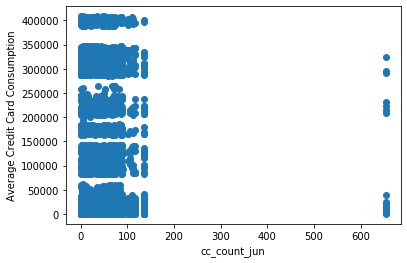

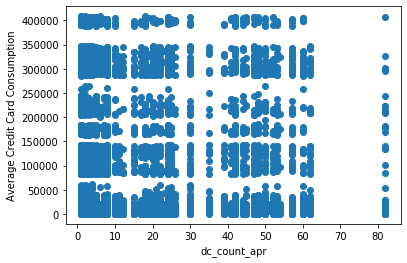

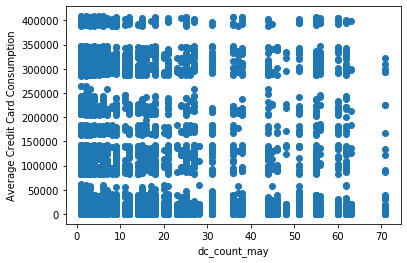

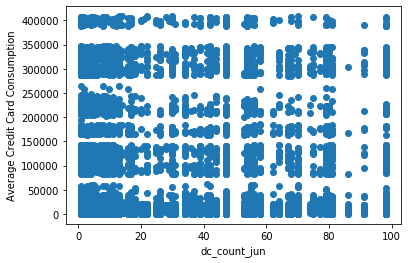

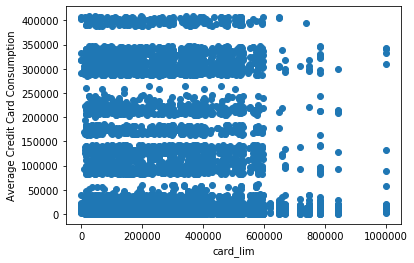

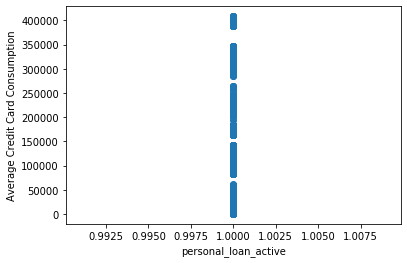

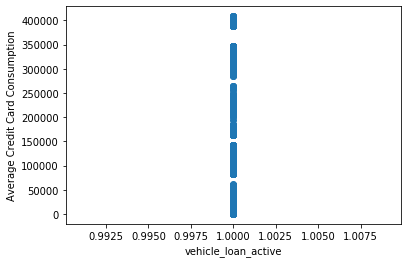

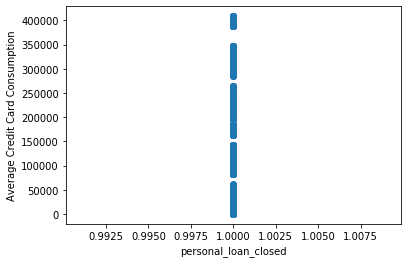

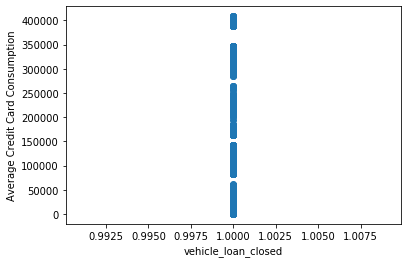

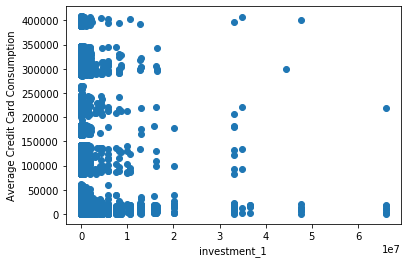

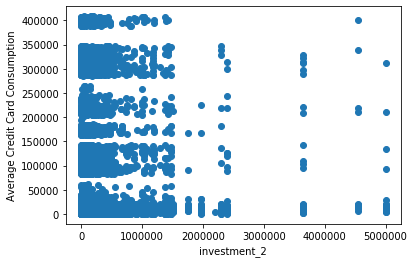

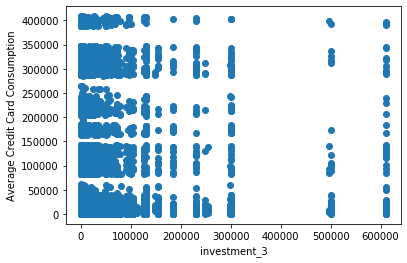

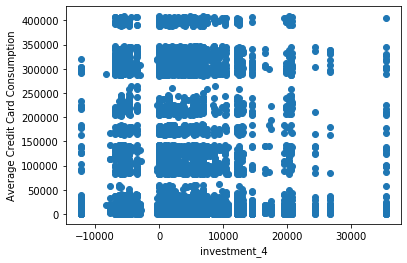

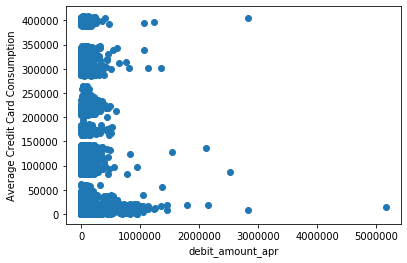

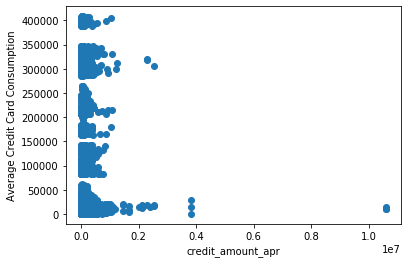

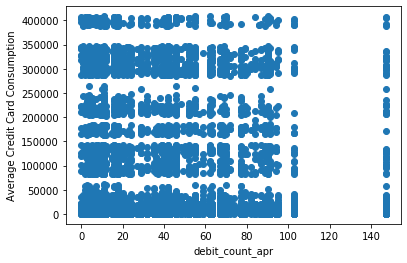

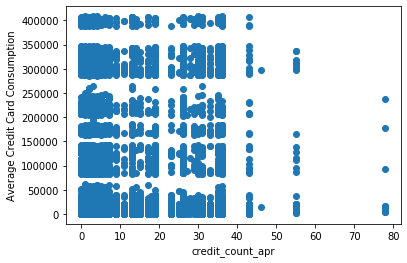

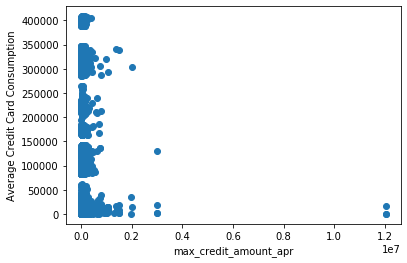

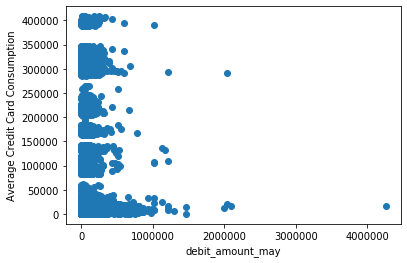

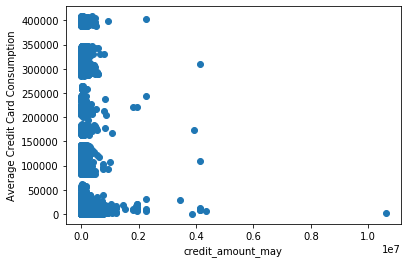

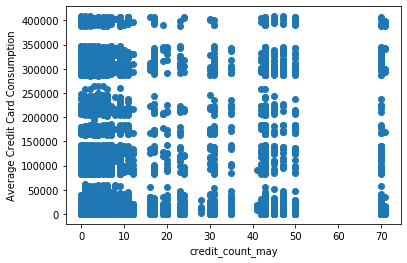

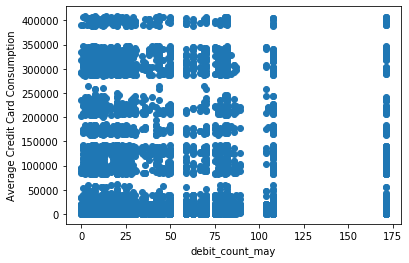

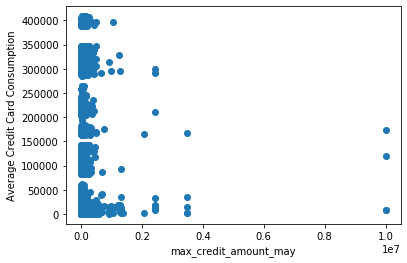

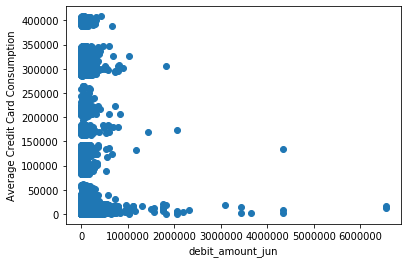

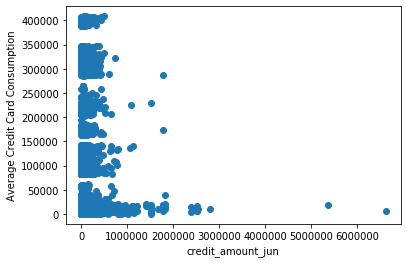

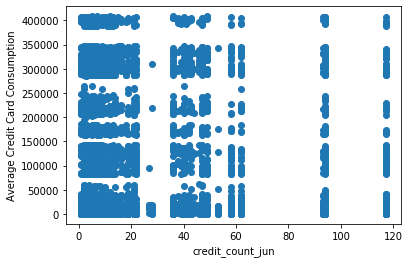

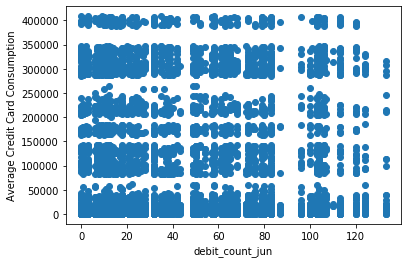

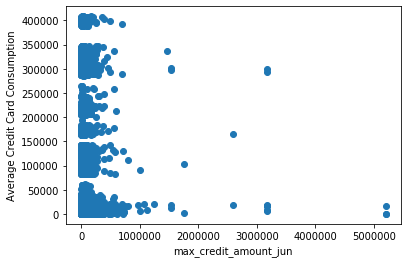

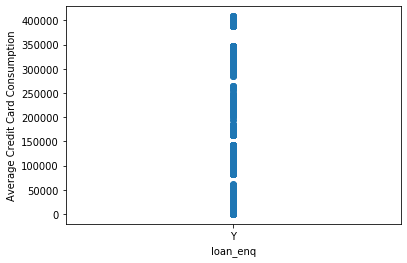

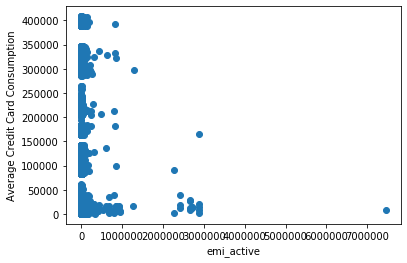

In [4]:
for cols in data.drop(['cc_cons','ID'],1).columns:
    plt.scatter(data[cols], data['cc_cons'])
    plt.xlabel(cols)
    plt.ylabel('Average Credit Card Consumption')
    plt.show()

In [5]:
data.skew()

ID                       -0.000523
age                       4.386093
region_code              -0.118365
cc_cons_apr               4.838710
dc_cons_apr               7.135574
cc_cons_may              12.056921
dc_cons_may              25.321685
cc_cons_jun               6.108982
dc_cons_jun               6.569554
cc_count_apr              4.417547
cc_count_may              7.518349
cc_count_jun              7.190550
dc_count_apr              1.102698
dc_count_may              1.526300
dc_count_jun              0.732877
card_lim                  0.442569
personal_loan_active      0.000000
vehicle_loan_active       0.000000
personal_loan_closed      0.000000
vehicle_loan_closed       0.000000
investment_1             11.603971
investment_2              5.475358
investment_3              4.075013
investment_4              1.084492
debit_amount_apr         13.104348
credit_amount_apr        32.632376
debit_count_apr           1.089453
credit_count_apr          1.161724
max_credit_amount_ap

In [6]:
for col in data.drop(['loan_enq','account_type','gender','ID'],1).columns:
    data[col]=np.sqrt(data[col])

C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
data.skew()

ID                      -0.000523
age                      3.104259
region_code             -0.408972
cc_cons_apr              1.627942
dc_cons_apr              2.207385
cc_cons_may              2.002009
dc_cons_may              3.294896
cc_cons_jun              1.890619
dc_cons_jun              2.317558
cc_count_apr             2.653844
cc_count_may             1.677811
cc_count_jun             0.932037
dc_count_apr             0.592788
dc_count_may             0.884374
dc_count_jun             0.219475
card_lim                -0.254473
personal_loan_active     0.000000
vehicle_loan_active      0.000000
personal_loan_closed     0.000000
vehicle_loan_closed      0.000000
investment_1             4.713771
investment_2             1.784030
investment_3             1.833091
investment_4             0.394800
debit_amount_apr         2.415966
credit_amount_apr        4.068821
debit_count_apr          0.244746
credit_count_apr         0.586594
max_credit_amount_apr    7.221904
debit_amount_m

In [8]:
df2=data.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],1)

In [9]:
df2=df2.fillna(0)

In [10]:
le_account_type=LabelEncoder()
df2['account_type']=le_account_type.fit_transform(df2['account_type'])

In [11]:
le_gender=LabelEncoder()
df2['gender']=le_gender.fit_transform(df2['gender'])

In [12]:
X=df2.drop('cc_cons',1)
y=df2['cc_cons']
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.25, random_state=5)

In [13]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_pred_train=lr.predict(X_train)
y_pred_val=lr.predict(X_val)

In [15]:
train_rmsle=rmsle(y_train, y_pred_train)
val_rmsle=rmsle(y_val, y_pred_val)
print(train_rmsle, val_rmsle)

0.8590828737942549 0.8644844465165662


In [16]:
test=pd.read_csv('Test.csv')
test.head()

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  17591      current      M   37          575      2795.45       1290.0   
1  13541      current      M   33          394     29405.13       1640.0   
2  13431      current      M   53          324      5985.20       6189.0   
3   8687      current      M   33          370      2105.93      18225.0   
4  14727      current      M   62          505      3269.00       3532.0   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  credit_count_may  \
0      6141.05       676.50      9146.10  ...              24.0   
1      1670.00      2463.92     10947.50  ...              43.0   
2      2696.09       766.00       716.00  ...              42.0   
3     34763.56       167.00      4260.27  ...               3.0   
4      3158.40      2699.77      3373.48  ...              70.0   

   debit_count_may  max_credit_amount_may  debit_amount_jun  \
0             20.0                 9750.0          30527.88   
1             40.0                16967.0          14342.83   
2             35.0                36398.0          32503.16   
3              5.0                97825.0          93572.42   
4             75.0                27936.0          19011.50   

   credit_amount_jun  credit_count_jun  debit_count_jun  \
0           31271.00               3.0             12.0   
1           16582.00               6.0             39.0   
2           33539.54               5.0              9.0   
3          109429.75              21.0              0.0   
4           41401.00               6.0             35.0   

   max_credit_amount_jun  loan_enq  emi_active  
0               25945.92         Y     1170.49  
1               12214.00         Y    16447.45  
2               13215.00         Y     2622.28  
3               72317.00         Y      340.79  
4               42344.00         Y     2812.20  

[5 rows x 43 columns]

In [17]:
X_test=test.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],1)

In [18]:
for col in X_test.drop(['account_type','gender'],1).columns:
    X_test[col]=np.sqrt(X_test[col])

C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
X_test['account_type']=le_account_type.transform(X_test['account_type'])

X_test['gender']=le_gender.transform(X_test['gender'])

In [20]:
X_test=X_test.fillna(0)

In [21]:
y_pred=lr.predict(X_test)

In [22]:
X_test['cc_cons']=y_pred**2

In [23]:
result2=pd.DataFrame(X_test['cc_cons'])

In [24]:
result2

cc_cons
ID                 
17591  29646.044780
13541  31121.148225
13431  30266.984663
8687   36345.969618
14727  31583.591454
...             ...
12512  28444.234284
14224  29466.068133
18740  27514.414850
18134  28765.577386
12413  29144.778967

[5000 rows x 1 columns]

In [25]:
result2.to_csv('submission2.csv',index=True)